In [39]:
import polars as pl
import requests
import io

from kloppy.utils import github_resolve_raw_data_url

# 1. Load matches and squads data from IMPECT Open Data repository
match_url = github_resolve_raw_data_url(
    repository="ImpectAPI/open-data",
    branch="main",
    file="data/matches/matches_743.json"
)
squads_url = github_resolve_raw_data_url(
    repository="ImpectAPI/open-data",
    branch="main",
    file="data/squads/squads_743.json"
)

# 2. Load and process matches data
response = requests.get(match_url)
matches = (
    pl.read_json(io.StringIO(response.text))
    .unnest("matchDay")
    .rename({'iterationId': 'competitionId', 'id': 'matchId'})
    .drop(['idMappings', 'lastCalculationDate', 'name', 'available'])
    .with_columns([
        (pl.col("index") + 1).alias("matchDay")
    ])
    .drop("index")
)

response = requests.get(squads_url)
squads = (
    pl.read_json(io.StringIO(response.text))
    .drop(['type', 'gender', 'imageUrl', 'idMappings', 'access', 'countryId'])
)


In [40]:
matches = (
    matches
    .join(
        squads.rename({"name": "homeTeam"}),
        left_on="homeSquadId",
        right_on="id",
        how="left"
    )
    .join(
        squads.rename({"name": "awayTeam"}),
        left_on="awaySquadId",
        right_on="id",
        how="left"
    )
)

matches

competitionId,matchId,homeSquadId,awaySquadId,scheduledDate,matchDay,homeTeam,awayTeam
i64,i64,i64,i64,str,i64,str,str
743,122838,38,33,"""2023-08-18T18:30:00Z""",1,"""SV Werder Bremen""","""FC Bayern München"""
743,122839,41,37,"""2023-08-19T13:30:00Z""",1,"""Bayer 04 Leverkusen""","""RasenBallsport Leipzig"""
743,122840,30,432,"""2023-08-19T13:30:00Z""",1,"""VfL Wolfsburg""","""1. FC Heidenheim 1846"""
743,122841,31,34,"""2023-08-19T13:30:00Z""",1,"""TSG 1899 Hoffenheim""","""SC Freiburg"""
743,122842,46,416,"""2023-08-19T13:30:00Z""",1,"""VfB Stuttgart""","""VfL Bochum"""
…,…,…,…,…,…,…,…
743,123139,46,32,"""2024-05-18T13:30:00Z""",34,"""VfB Stuttgart""","""Borussia Mönchengladbach"""
743,123140,432,27,"""2024-05-18T13:30:00Z""",34,"""1. FC Heidenheim 1846""","""1. FC Köln"""
743,123141,38,416,"""2024-05-18T13:30:00Z""",34,"""SV Werder Bremen""","""VfL Bochum"""


In [41]:
from kloppy import impect

match_id = 123143 
dataset = impect.load_open_data(
    match_id=match_id,
    competition_id=743,
)


In [42]:
df = (
    dataset
    .transform(to_coordinate_system="statsbomb")  
    .filter(lambda event: event.event_type.name in ["PASS", "SHOT"])
    .to_df(engine="pandas")
)

df.head()

,event_id,event_type,period_id,timestamp,end_timestamp,ball_state,ball_owning_team,team_id,player_id,coordinates_x,coordinates_y,end_coordinates_x,end_coordinates_y,receiver_player_id,body_part_type,set_piece_type,result,success,is_under_pressure,pass_type
0,4607691093,PASS,1,0 days 00:00:00,0 days 00:00:00.561000,alive,36,36,10430,60.000000,40.000000,38.112069,39.344262,10528,RIGHT_FOOT,KICK_OFF,COMPLETE,True,None,None
1,4607691096,PASS,1,0 days 00:00:01.534000,0 days 00:00:02.570000,alive,36,36,10528,40.646552,39.781421,39.801724,23.629091,4670,RIGHT_FOOT,None,COMPLETE,True,None,None
2,4607691098,PASS,1,0 days 00:00:02.570100,0 days 00:00:04.867000,alive,36,36,4670,39.801724,23.629091,21.178082,30.501818,9702,RIGHT_FOOT,None,COMPLETE,True,True,None
3,4607691100,PASS,1,0 days 00:00:04.867099,0 days 00:00:08.471999,alive,36,36,9702,21.178082,30.501818,73.439655,35.847273,None,RIGHT_FOOT,None,INCOMPLETE,False,None,CHIPPED_PASS
4,4607691102,PASS,1,0 days 00:00:08.472099,0 days 00:00:09.798999,alive,36,29,296,46.560345,44.152727,69.398907,40.655738,None,HEAD,None,INCOMPLETE,False,True,HEAD_PASS


In [43]:
from player_passmap import pass_map
from player_heatmap import heat_map

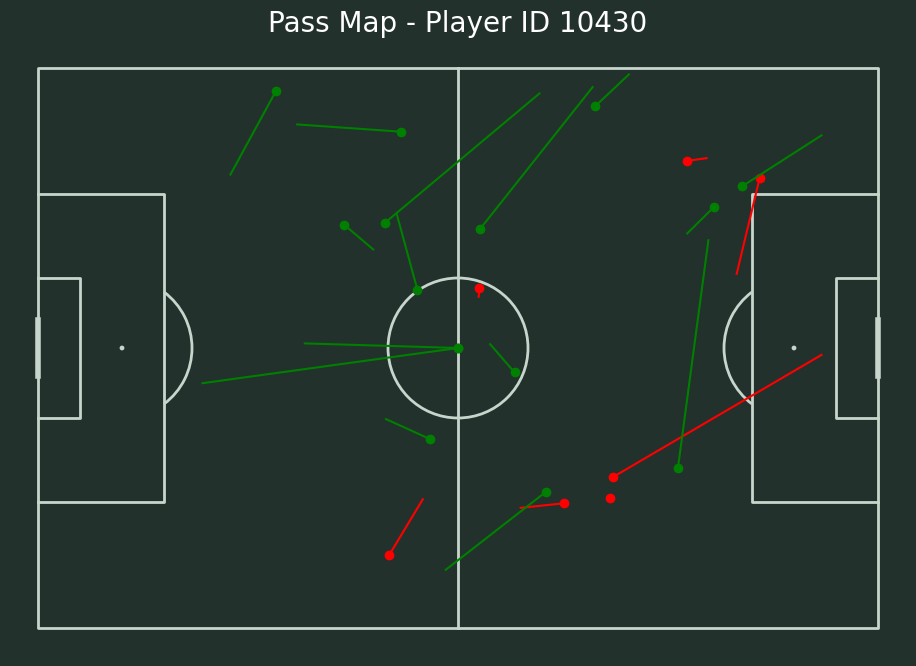

In [44]:
pass_map(df, player_id='10430')

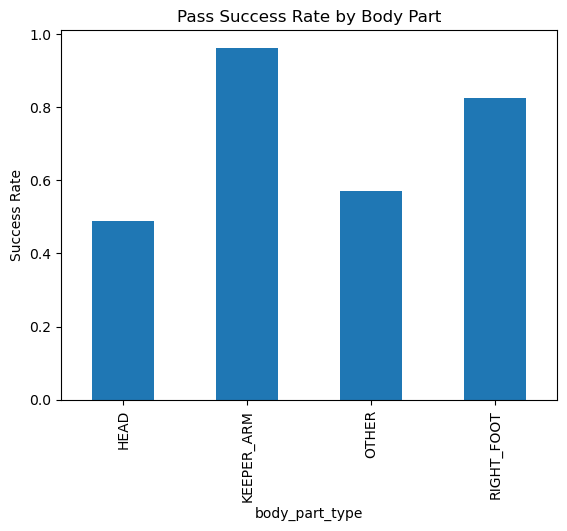

In [45]:
import matplotlib.pyplot as plt
pass_success_rate = (
    df[df['event_type'] == 'PASS']
    .groupby('body_part_type')['success']
    .mean()
)

pass_success_rate.plot(kind='bar')
plt.ylabel('Success Rate')
plt.title('Pass Success Rate by Body Part')
plt.show()


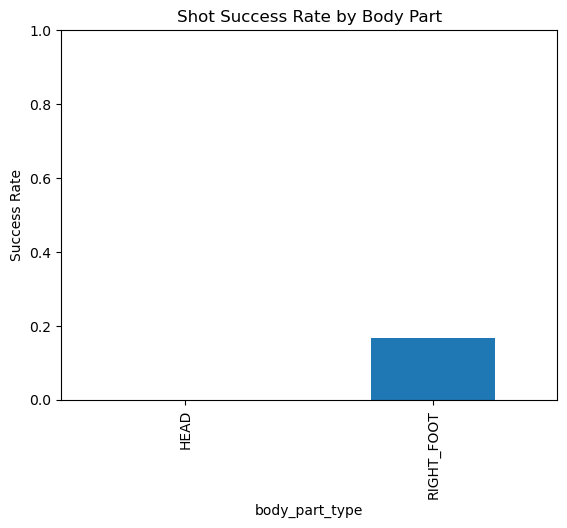

In [46]:
success_by_body_part = (
    df[df['event_type'] == 'SHOT']
    .groupby('body_part_type')['success']
    .mean()
)

success_by_body_part.plot(kind='bar')
plt.ylabel('Success Rate')
plt.title('Shot Success Rate by Body Part')
plt.ylim(0, 1)
plt.show()
